## Text Analytics -- Case Study: Fight Club Novel

### Highly Recommended: The graphs/plots in the notebook can be viewed using this link: [nbviewer](https://nbviewer.jupyter.org), because the plotly graphs cannot be viewed in github.

- The aim of this text analytics project is to analyse a storybook or novel through extracting out the characters, their dialogue, words/verbs used them and also to check the locations and time occurences mentioned in the novel.

**Objectives:**

- Extract out the major characters, time occurences and geopolitical locations mentioned in the Novel.
- Extract out the interaction between the top characters if any, i.e. check if two characters appear in the same sentences
- Check the Gender distribution based on the characters in the Novel
- Extract out sentences where characters are the "Subject" and the corresponding "action verbs" used by them



### Steps Ahead:
- Convert PDF Book(.pdf) to Text Format (.txt) 
- Data Cleaning with Regex (Regular Expression)
- Entity Extraction with Spacy
- Data Visualization with Plotly:
    - Character, Geopolitical and Time occurence Visualizations
    - Gender Distribution charts
    - Character's Appearances Visualizations
- Dependency parsing -- to extract sentences where characters are the "Subject" of Sentences
- Character's action visualization


- Tools utilized: ***Spacy, NLTK, Ploty, Seaborn, Regex***
#### ***Note: All the codes are ran from the following python modules: pdf_to_txt.py, txt_extract.py, gender.py, text_plots.py, subj.py***

In [1]:

# plotly
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

#### - Convert from PDF to Txt.format

In [11]:
# from pdf_to_txt import pdf_to_text

In [2]:
# pdfDir = r"C:\Users\Adeboye Adeniyi\Documents\filmscripts\pdfscripts/"
# txtDir = r'C:\Users\Adeboye Adeniyi\Documents\filmscripts\textscripts/'


In [3]:
# convert = pdf_to_text(pdfDir, txtDir)

In [4]:
# convert.convertMultiple()

In [3]:
from txt_extract import text_extract

In [5]:
txt = text_extract('./textscripts/Fight Club BOOK.pdf.txt')

In [6]:
text_data, df_chapter, df_sentences = txt.clean_text()

In [7]:
person, gpe, time = txt.extract_entities(df_chapter, df_sentences)

In [8]:
characters, refined_gpes = txt.remove_similar(person,gpe)

In [9]:
print(characters)

['Tyler', 'Marla', 'Bob', 'Chloe', 'Albert', 'Durden', 'Walter', 'Patrick Madden', 'Leslie', 'Raymond Hessel', 'Robert Paulson', 'Raymond K', 'Epsom', 'Mrs Patrick Madden', 'Jesus', 'Paul', 'Seconals', 'Alice', 'Willow Run', 'Angle Dickinson', 'CatchUp Rap', 'Barbie', 'Long', 'Krishna', 'Blarney', 'Len', 'Abby', 'Robin Hood', 'Dad']


In [10]:
#Count the amount of times entities appeared in the whole Novel
#Check how many chapters and sentences entities appear in 

count_xters, xters_chpts = txt.count(df_chapter, characters)
count_gpes, gpe_chpts = txt.count(df_chapter, refined_gpes)

In [12]:
from gender import gender_distribution

In [13]:
gd = gender_distribution(characters)

In [15]:
df_gender = gd.gender_types()

In [16]:
from text_plots import plot_results

In [17]:
plt = plot_results('Fight Club Novel')

In [18]:
plt.gender_plot(df_gender)

### - Entity Extraction and Visualization -- Person, GPE - Geopolitical locations, Time Ocuurences

In [19]:
plt.plot_entitycount(count_xters, 'Major Characters', px.colors.diverging.Spectral)

In [20]:
plt.plot_entitycount(count_gpes, 'Geopolitical Places', px.colors.cyclical.mygbm)

In [21]:
plt.plot_entitycount(time, 'Time occurences', px.colors.cyclical.Phase)

In [22]:
plt.plot_ctper(xters_chpts, 'Major Character', px.colors.sequential.Viridis)

In [23]:
plt.plot_ctper(gpe_chpts, 'Geopolitical places', px.colors.sequential.Sunset)

### - Character Appearances across the entire Novel

In [24]:
#Check the top 3 character's interaction with each other
top1_2, top2_3, top1_3 = plt.top3xters_interaction(characters)

In [25]:
top1_2

['Tyler', 'Marla']

In [26]:
#Lets if the TOP 3 Characters interact within the Novel based on their appearance in the same sentence
#Also extract the sentence in which they occur in

top1_2_sent = plt.extract_sentences_plot(df_sentences, top1_2, ['blue', 'pink'])

      Tyler  Marla                                           Contents
75      1.0    1.0                                 Tyler wants  Marla
77      1.0    1.0     I dont want Marla, and Tyler doesnt want me...
80      1.0    1.0            Without Marla, Tyler would have nothing
968     1.0    1.0                      This is how Tyler meets Marla
1005    1.0    1.0   After I went to sleep last night, Tyler  tell...


In [29]:
#top2_3_sent = plt.extract_sentences_plot(df_sentences, top2_3, ['green', 'purple'])

In [27]:
top1_3_sent = plt.extract_sentences_plot(df_sentences, top1_3, ['orange', 'purple'])

      Tyler  Bob                                           Contents
1788    1.0  2.0  " Big Bob asks, "do you know him? "i have neve...
2341    2.0  1.0   I ask, has he seen  Tyler lately? Did Tyler s...
2345    1.0  2.0   Has Tyler promised Big Bob enlightenment if h...
2349    2.0  2.0     Before I leave for work, I ask Big Bob, who...


In [28]:
print(characters)

['Tyler', 'Marla', 'Bob', 'Chloe', 'Albert', 'Durden', 'Walter', 'Patrick Madden', 'Leslie', 'Raymond Hessel', 'Robert Paulson', 'Raymond K', 'Epsom', 'Mrs Patrick Madden', 'Jesus', 'Paul', 'Seconals', 'Alice', 'Willow Run', 'Angle Dickinson', 'CatchUp Rap', 'Barbie', 'Long', 'Krishna', 'Blarney', 'Len', 'Abby', 'Robin Hood', 'Dad']


In [29]:
#Extract Sentences where characters were mentioned in the Novel
UnamedNarrator_sent = plt.extract_sentences_plot(df_sentences, 'I', ['#A040A0'])

      I                                           Contents
1   1.0   For a  long time though, Tyler and I were bes...
2   1.0   People are always asking,  did I know about T...
4   1.0  "   With my tongue I can feel the silencer hol...
12  1.0  "   I tongue the barrel into my cheek and say,...
18  1.0               I know this because Tyler knows this


In [30]:
#Extract Sentences where characters were mentioned in the Novel
Tyler_sent = plt.extract_sentences_plot(df_sentences, characters[0], ['red'])

   Tyler                                           Contents
0    2.0    Tyler Gets Me a job as a waiter, after that ...
1    1.0   For a  long time though, Tyler and I were bes...
2    1.0   People are always asking,  did I know about T...
3    1.0     The barrel of the gun pressed against the b...
9    1.0               "this isnt really death," Tyler says


In [31]:
#Extract Sentences where characters were mentioned in the Novel
Marla_sent = plt.extract_sentences_plot(df_sentences, characters[1], ['#B8A038'])

    Marla                                           Contents
71    1.0    While desks and filing cabinets and computer...
75    1.0                                 Tyler wants  Marla
76    1.0                                     Marla wants me
77    1.0     I dont want Marla, and Tyler doesnt want me...
80    1.0            Without Marla, Tyler would have nothing


In [32]:
#Extract Sentences where characters were mentioned in the Novel
Bob_sent = plt.extract_sentences_plot(df_sentences, characters[2], ['#EE99AC'])

    Bob                                           Contents
89  2.0    ,   Bob  Big Arms were closed around to hold...
90  2.0   Going around the church basement full  of men...
91  1.0   Bob  thick blond hair was what  you get when ...
92  1.0     His arms wrapped around me, Bob  hand palms...
93  1.0                     "it will be alright," Bob says


In [33]:
#Extract Sentences where characters were mentioned in the Novel
Chloe_sent = plt.extract_sentences_plot(df_sentences, characters[3], ['yellow'])

     Chloe                                           Contents
166    2.0     The little skeleton of a woman named Chloe ...
167    1.0   Here she was, so  close to death that her lif...
170    2.0     All this dying had started with Chloe being...
172    1.0     During the French Revolution, Chloe told me...
173    1.0                     Chloe breathed against my neck


### Dependency parsing in Spacy
### - Extraction of Sentences where characters are the "Subjects" and their corresponding action verbs

In [35]:
from subj import subjects

In [36]:
sub = subjects(text_data, characters)

In [37]:
#Extract sentences where characters are the "Subjects"
span_doc, df_spans = sub.subject_action()

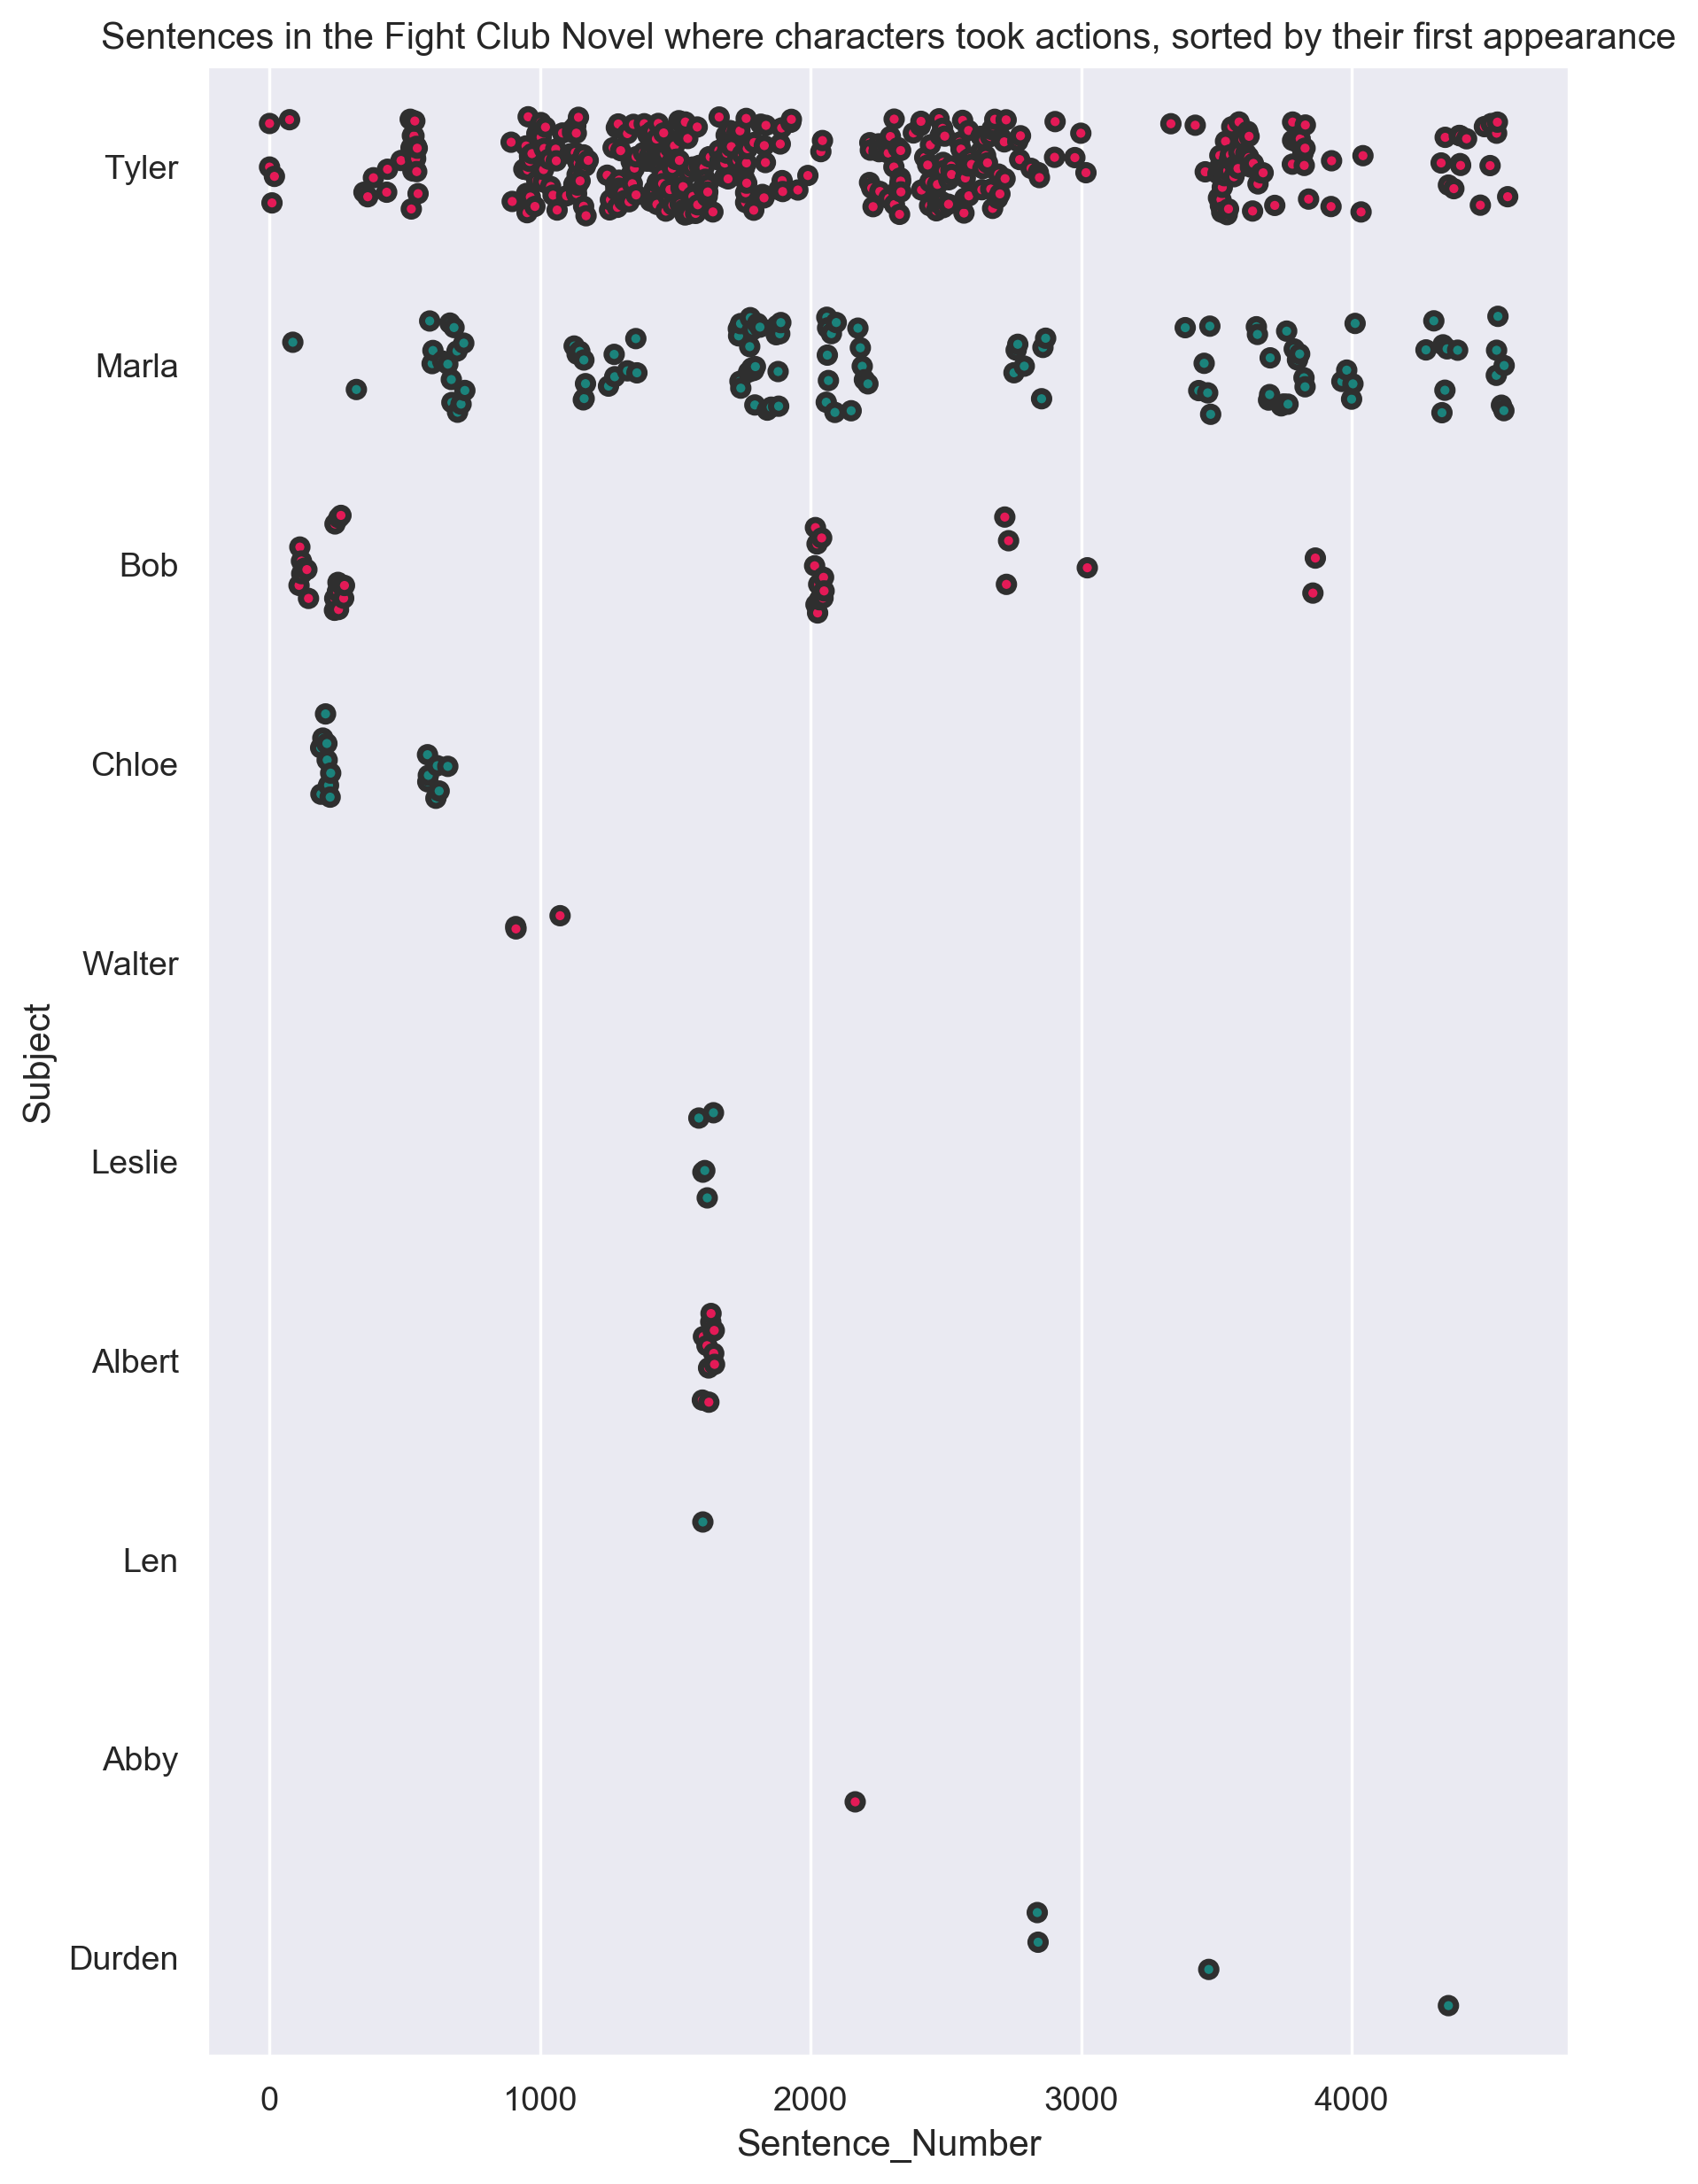

In [38]:
plt.action_plot(df_spans)

In [39]:
#Extract most common verbs and plot for all the Major characters --- Decide the Number of Top Verbs to extract/visualize
most_common_verbs = plt.most_common(df_spans, 5)

In [40]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[0], 20, px.colors.cyclical.IceFire)

In [41]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[1], 20, px.colors.sequential.thermal)

In [42]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[2], 20, px.colors.sequential.Blackbody)

In [43]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[3], 20, px.colors.diverging.PRGn)

### Summary:

- Spacy's NER (Named Entity Recognition) is not quite optimized for Entity extraction from Novels, as you observed there were a lot misclassification of entities that we had to use another technique to deal with, but still there were these error in classification still persisted.


- The next step will be to look at the sentences where specific characters were mentioned and perform various analyses on them such as Sentiment analysis, document similarity between different characters to compare and contrast, etc.,


- Also, these analyses could be useful for film adaptation, in the sense that it gives a screen writer a sense of the major characters (including the unamed narrator) that are needed for the movie if the novel is to be adapted.